In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
first_data = pd.read_csv('./MainData AY 23-24 Oct 2023.csv')
first_data.head()

,Month,RowID,Response ID,"Overall, how satisfied are you with your experience living on campus at SDSU in the last 30 days?",Please explain why you are not satisfied with your experience living on campus at SDSU:,Front Desk,Wepa Printing Kiosk,Laundry Facilities,"Outdoor Recreation Facilities (pool, patio, fire pit, etc.)",The UPS Store,...,Country,Residency,RLC_Updated,RLC_GroupCoded,Coded_RoomType,Coded_ClassLevel,Classification,Gender,Type of Building,AttendStatus
0,October,101,R_Y3LSnMS91cFvTUZ,Satisfied,Did not answer,Yes,Yes,Yes,Yes,Yes,...,United States of America,California Resident,No Theme or Residential Learning/Living Community,No Learning Community,Single,Junior,Returning,M,Sophomore and Upper Div,ATTENDING
1,October,677,R_1MSpOeErO1vMEno,Satisfied,Did not answer,Yes,No,Yes,Yes,Yes,...,India,Foreign,No Theme or Residential Learning/Living Community,No Learning Community,Single,Freshman,Continuing,M,Sophomore and Upper Div,ATTENDING
2,October,667,R_28zIRj9xXv5UT2p,Satisfied,Did not answer,Yes,Not Applicable,Yes,No,Yes,...,United States of America,California Resident,No Theme or Residential Learning/Living Community,No Learning Community,Student Leader/Staff,Graduate,Graduate,F,Sophomore and Upper Div,ATTENDING
3,October,270,R_2CqOiVX3yrj9Rd4,Satisfied,Did not answer,Yes,Yes,Yes,Yes,Yes,...,United States of America,California Resident,No Theme or Residential Learning/Living Community,No Learning Community,Student Leader/Staff,Senior,Returning,M,First Year,ATTENDING
4,October,341,R_3Jla1YNQA0hntPd,Satisfied,Did not answer,Not Applicable,Not Applicable,Yes,Not Applicable,Yes,...,United States of America,Out of State,No Theme or Residential Learning/Living Community,No Learning Community,Double,Sophomore,Returning,F,Sophomore and Upper Div,ATTENDING


In [4]:
first_data.columns

Index(['Month', 'RowID', 'Response ID',
       'Overall, how satisfied are you with your experience living on campus at SDSU in the last 30 days?',
       'Please explain why you are not satisfied with your experience living on campus at SDSU:',
       'Front Desk', 'Wepa Printing Kiosk', 'Laundry Facilities',
       'Outdoor Recreation Facilities (pool, patio, fire pit, etc.)',
       'The UPS Store', 'Streeme TV or Cable', 'WiFi',
       'Residential Bike Storage and Bike Racks', 'Surfboard Storage',
       'Community Study Areas', 'Community Kitchens', 'Vending Machines',
       'Have you utilized a STAR Center in the last 30 days?',
       'Please explain why you are not using the Star Center:',
       'Cleanliness of your residential community common areas (bathrooms, laundry rooms, hallways, lounges)',
       'Maintenance of your residential community (furniture, utilities, appliances)',
       'Amenities of your residential community (i.e., wifi, lounges, furniture, laundry, out

In [5]:
first_data["RowID"].value_counts()

RowID
211    1
101    1
677    1
667    1
270    1
      ..
578    1
199    1
684    1
441    1
202    1
Name: count, Length: 762, dtype: int64

<Axes: xlabel='How would you rate your mental health during the last 30 days?'>

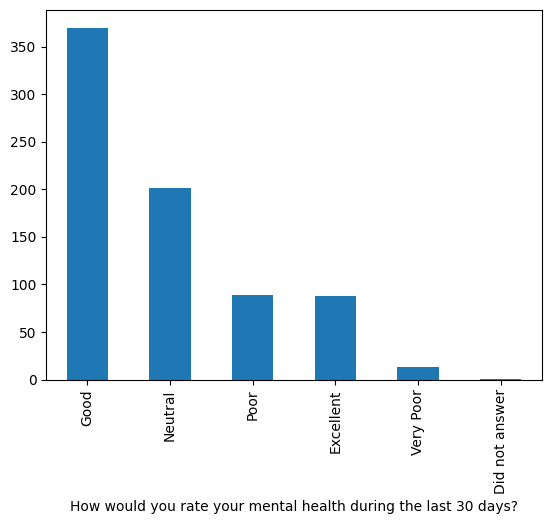

In [8]:
first_data["How would you rate your mental health during the last 30 days?"].value_counts().plot(kind='bar')

In [12]:
print(first_data["How would you rate your mental health during the last 30 days?"].value_counts())

How would you rate your mental health during the last 30 days?
Good              370
Neutral           201
Poor               89
Excellent          88
Very Poor          13
Did not answer      1
Name: count, dtype: int64


In [13]:
mental_health_map = {
    "Very Poor": 1,
    "Poor": 2,
    "Neutral": 3,
    "Good": 4,
    "Excellent": 5
}

In [14]:
first_data["mental_health_score"] = first_data["How would you rate your mental health during the last 30 days?"].map(mental_health_map)

In [15]:
print(first_data[["How would you rate your mental health during the last 30 days?", "mental_health_score"]].head(10))

  How would you rate your mental health during the last 30 days?  \
0                                               Good               
1                                               Poor               
2                                            Neutral               
3                                               Good               
4                                            Neutral               
5                                               Good               
6                                               Good               
7                                          Excellent               
8                                            Neutral               
9                                               Good               

   mental_health_score  
0                  4.0  
1                  2.0  
2                  3.0  
3                  4.0  
4                  3.0  
5                  4.0  
6                  4.0  
7                  5.0  
8                  3.0  
9

Second Column

In [18]:
print(first_data["Have you reached out to SDSU Counseling and Psychological Services for mental health resources? If not, why not?"].value_counts(dropna=False))

Have you reached out to SDSU Counseling and Psychological Services for mental health resources? If not, why not?
Did not answer                                                                                                                                                                                                                                                                674
No, I have my own therapist.                                                                                                                                                                                                                                                    2
No                                                                                                                                                                                                                                                                              2
Yes                                                              

In [19]:
def encode_cps_response(response):
    if pd.isnull(response):
        return None
    x = str(response).strip().lower()
    if x == "yes":
        return 1
    if "did not answer" in x:
        return 0
    return 0
first_data["reached_out_CPS"] = first_data["Have you reached out to SDSU Counseling and Psychological Services for mental health resources? If not, why not?"].apply(encode_cps_response)

In [21]:
print(first_data[["Have you reached out to SDSU Counseling and Psychological Services for mental health resources? If not, why not?", "reached_out_CPS"]].head(10))
print(first_data["reached_out_CPS"].value_counts(dropna=False))

  Have you reached out to SDSU Counseling and Psychological Services for mental health resources? If not, why not?  \
0                                     Did not answer                                                                 
1                                Not yet but i might                                                                 
2                                     Did not answer                                                                 
3                                     Did not answer                                                                 
4                                     Did not answer                                                                 
5                                     Did not answer                                                                 
6                                     Did not answer                                                                 
7                                     Did not answer    